## Karthik Senthil

## The Sparks Foundation

## GRIPSEPTEMBER21

## Data Science & Business Analytics

## Task 3 Exploratory Data Analysis Retail

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
df.shape

(9994, 13)

In [7]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

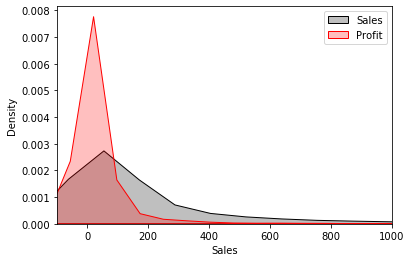

In [8]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['Sales'],color='Black',label='Sales',shade=True,)
sns.kdeplot(df['Profit'],color='Red',label='Profit',shade=True)
plt.xlim([-100,1000])
plt.legend()

In [12]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


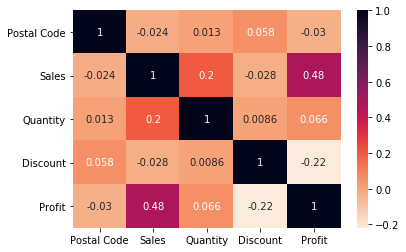

In [13]:
sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

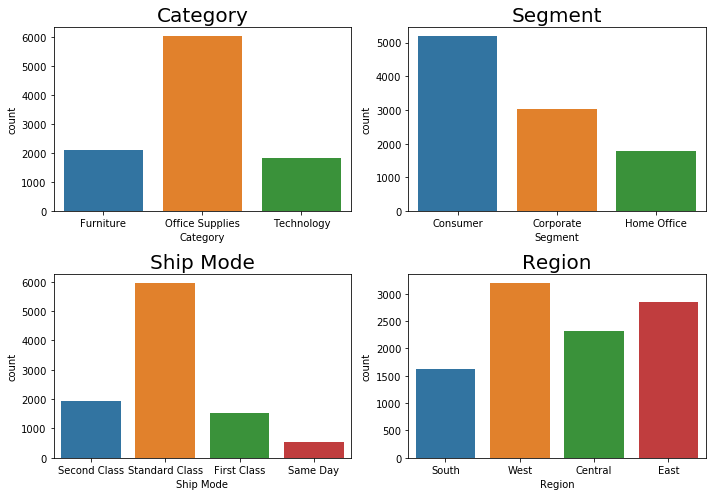

In [14]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(x = df['Category'],ax=axs[0][0])
sns.countplot(x = df['Segment'],ax=axs[0][1])
sns.countplot(x = df['Ship Mode'],ax=axs[1][0])
sns.countplot(x = df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)


plt.tight_layout()

Text(0.5, 1.0, 'Sub-Category')

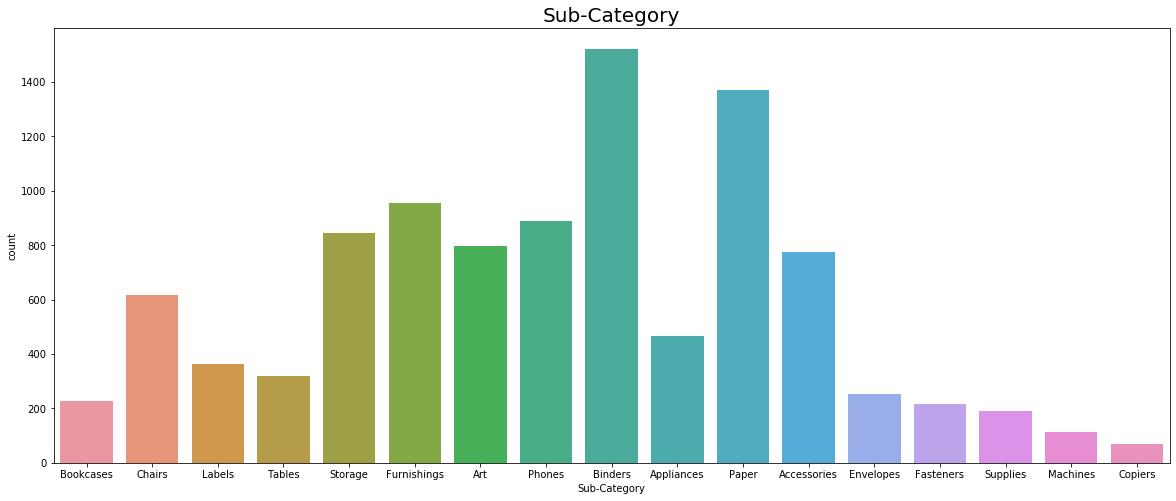

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(x = df['Sub-Category'])
plt.title('Sub-Category',fontsize=20)

Text(0.5, 1.0, 'State')

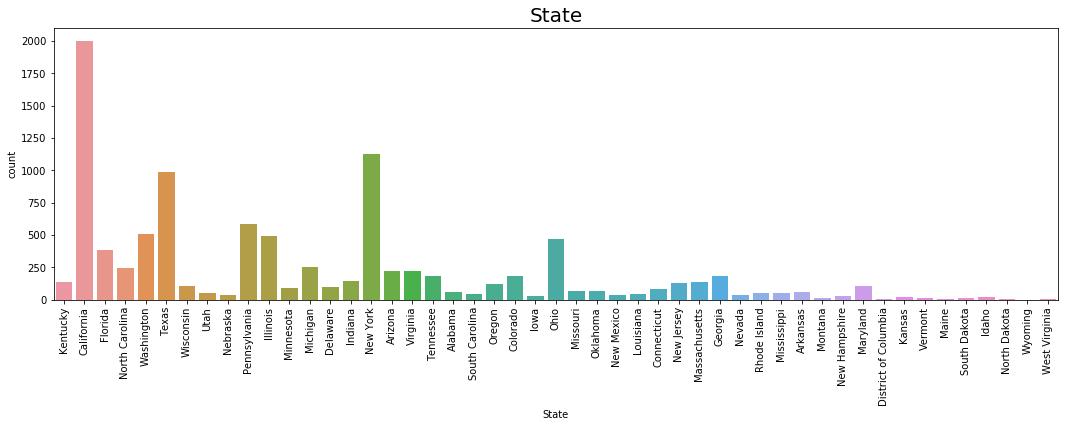

In [16]:
plt.figure(figsize=(18,5))
sns.countplot(x = df['State'])
plt.xticks(rotation=90)
plt.title('State',fontsize=20)

Text(0.5, 1.0, 'Quantity')

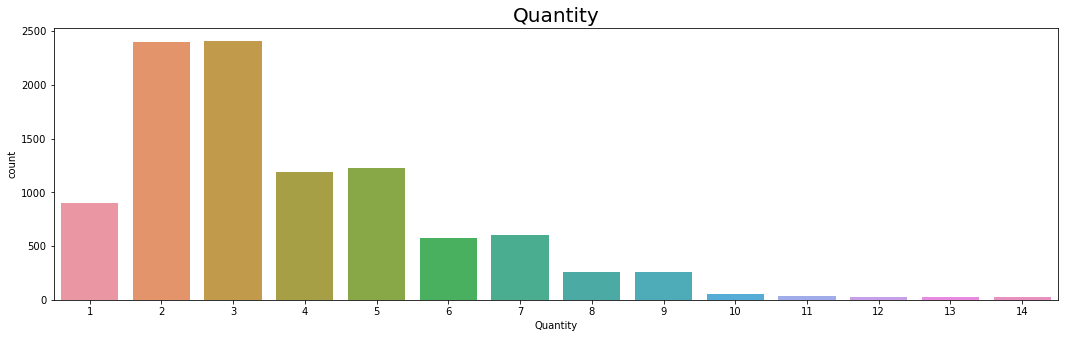

In [17]:
plt.figure(figsize=(18,5))
sns.countplot(x = df['Quantity'])
plt.title('Quantity',fontsize=20)

Text(0.5, 1.0, 'Discount')

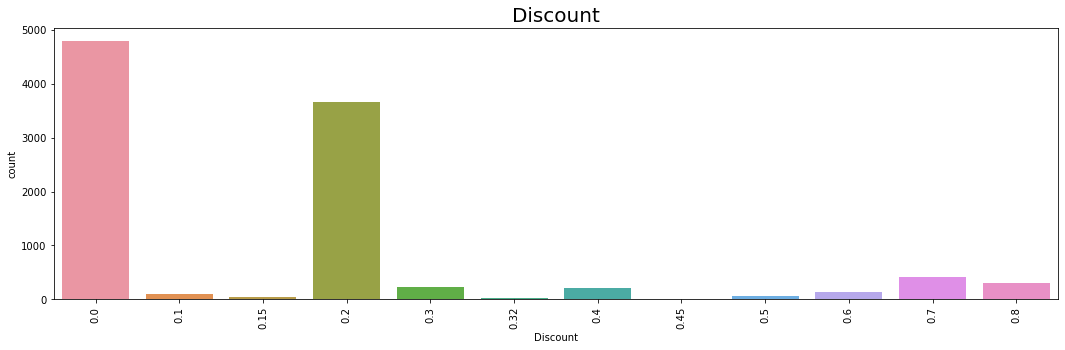

In [18]:
plt.figure(figsize=(18,5))
sns.countplot(x = df['Discount'])
plt.xticks(rotation=90)
plt.title('Discount',fontsize=20)

In [19]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [20]:
df1 = df['State'].value_counts()
df1.head(15)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Arizona            224
Virginia           224
Georgia            184
Tennessee          183
Colorado           182
Name: State, dtype: int64

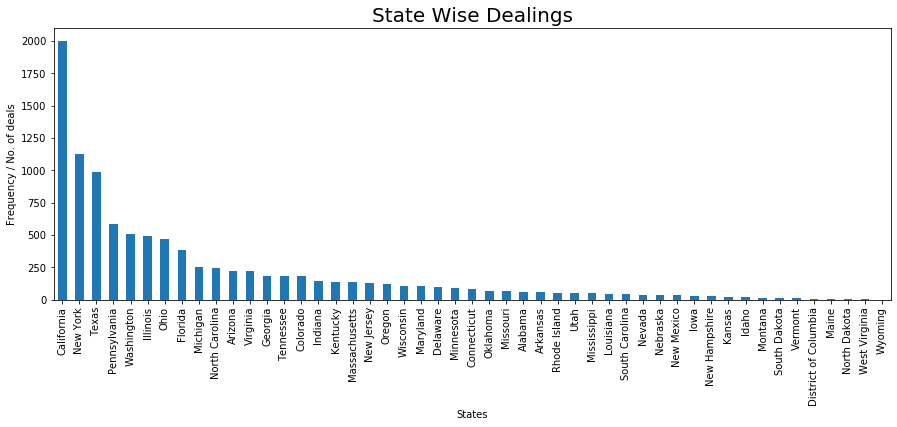

In [21]:
df1.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / No. of deals')
plt.xlabel('States')

plt.title('State Wise Dealings', fontsize = 20)
plt.show()

In [22]:
df['State'].value_counts().mean()

203.9591836734694

In [23]:
df2 = df['City'].value_counts()
df2=df2.head(50)

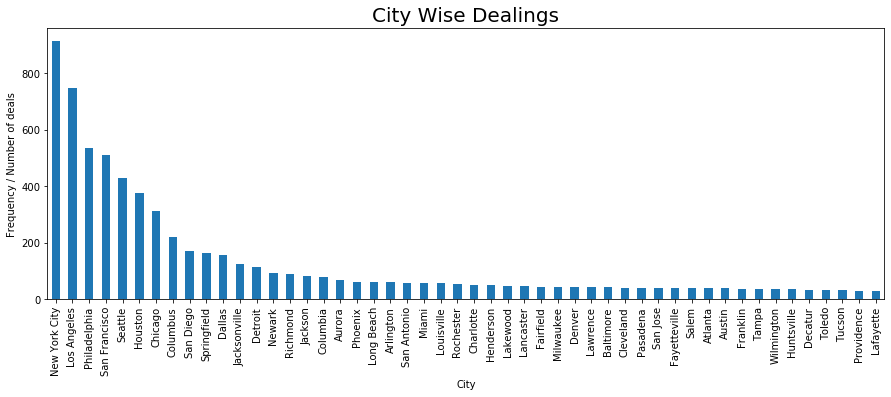

In [24]:
df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings', fontsize = 20)
plt.show()

In [25]:
df['City'].value_counts().mean()

18.821092278719398

In [26]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [27]:
df_segment= df.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount, profit')

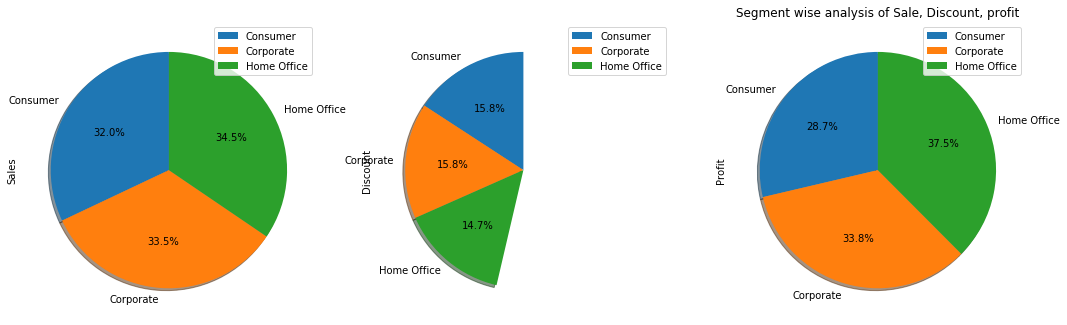

In [ ]:
#1. sales 2. Discount 3. Profit
df_segment.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(18, 20),
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_segment.index)
plt.title('Segment wise analysis of Sale, Discount, profit')

In [29]:
df['State'].value_counts().head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [30]:
df_state= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


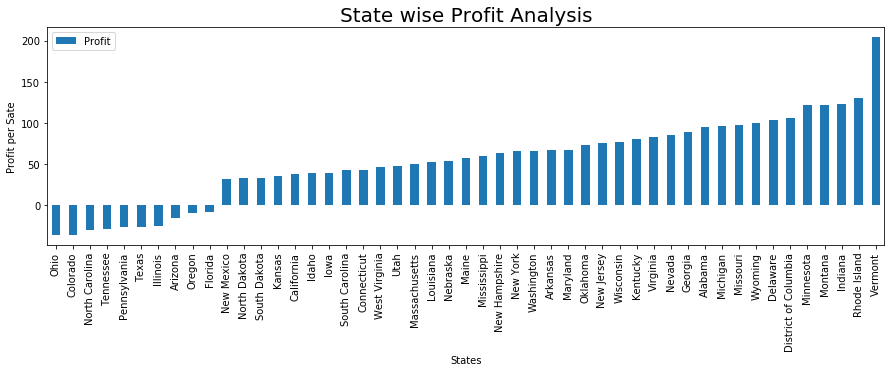

In [31]:
df_state1=df_state.sort_values('Profit')

df_state1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

Text(0.5, 1.0, 'State wise analysis of Sale')

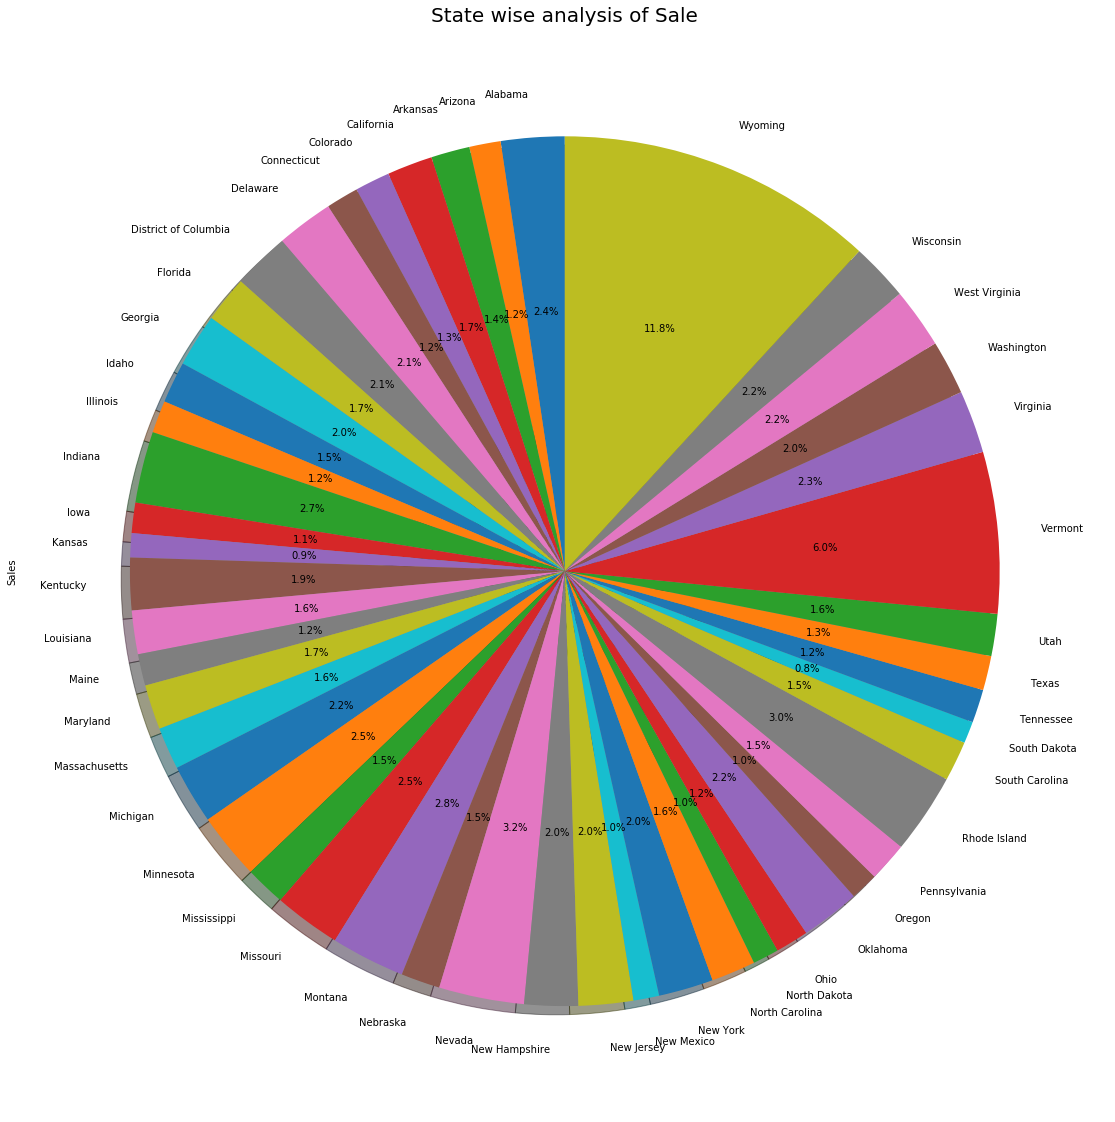

In [32]:
df_state['Sales'].plot(kind='pie',
                        figsize = (20,20),
                        autopct='%1.1f%%',
                        startangle=90,     # start angle 90° (Africa)
                        shadow=True)
plt.title('State wise analysis of Sale',fontsize=20)

Text(0.5, 1.0, 'State wise analysis of Discount')

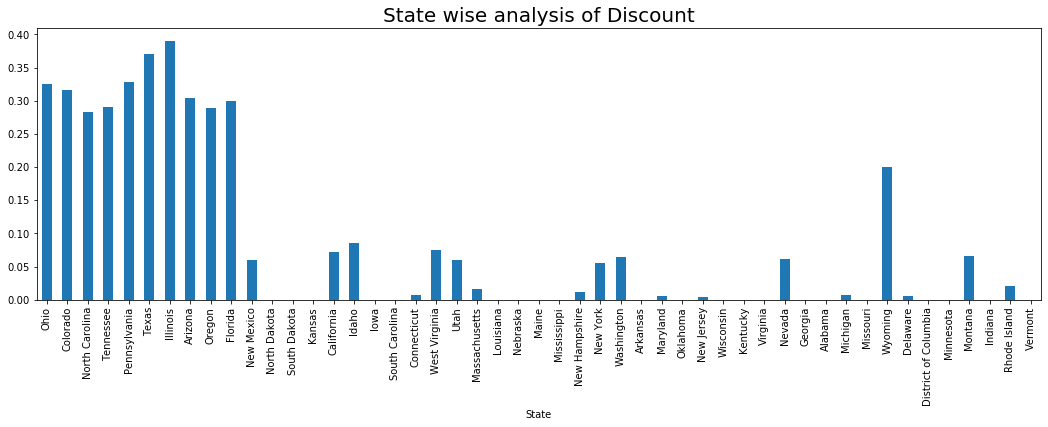

In [33]:
df_state1['Discount'].plot(kind='bar',figsize=(18,5))
plt.title('State wise analysis of Discount', fontsize=20)

In [ ]:
df_quantity = df.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
df_quantity.head(10)

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.354488,0.154858,16.006831
3,175.201578,0.153329,23.667715
4,271.764059,0.157708,37.131310
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


Text(0.5, 1.0, 'Quantity wise analysis of Sale, Discount, profit')

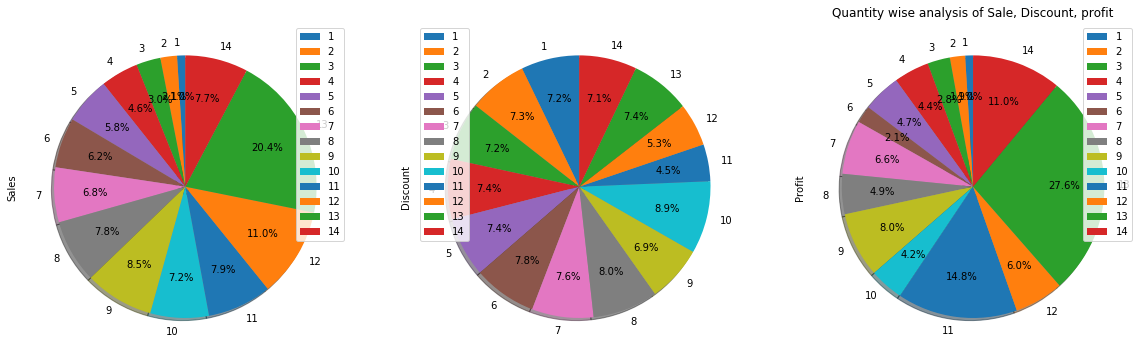

In [ ]:
#1. sales 2. Discount 3. Profit
df_quantity.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20, 20),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_quantity.index)
plt.title('Quantity wise analysis of Sale, Discount, profit')

In [ ]:
df_sub_category = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
df_sub_category.head(10)

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


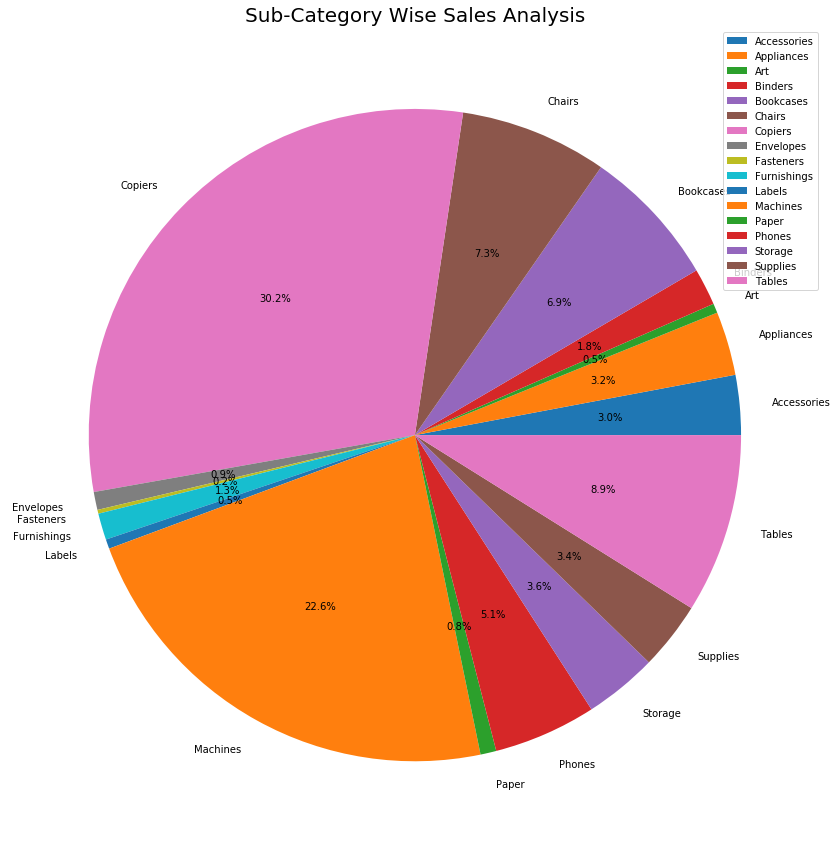

In [ ]:

plt.figure(figsize = (15,15))
plt.pie(df_sub_category['Sales'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Sales Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

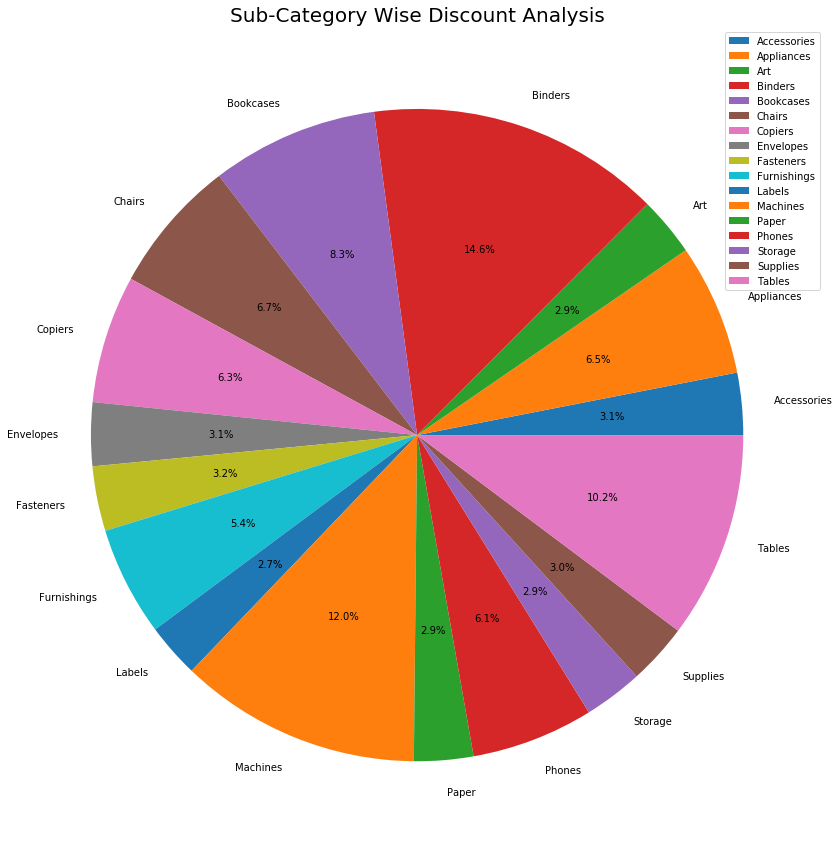

In [ ]:
plt.figure(figsize = (15,15))
plt.pie(df_sub_category['Discount'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Discount Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

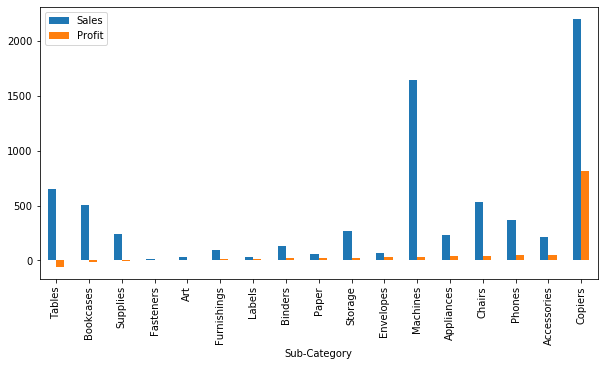

In [ ]:
df_sub_category.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',
                                                              figsize= (10,5),
                                                              label=['Avg Sales Price($)','Profit($)'])

In [ ]:
df_region = df.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1d43e8550>,
      dtype=object)

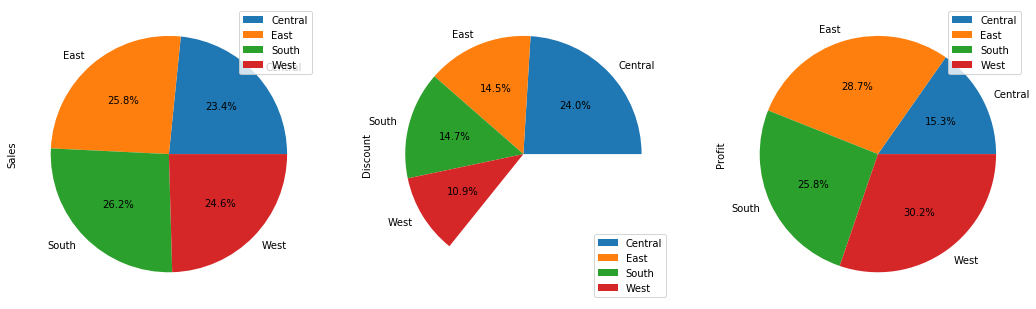

In [ ]:
df_region.plot.pie(subplots=True, 
                   figsize=(18, 20), 
                   autopct='%1.1f%%',
                   labels = df_region.index)

In [ ]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [ ]:
df_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1d4303d90>,
      dtype=object)

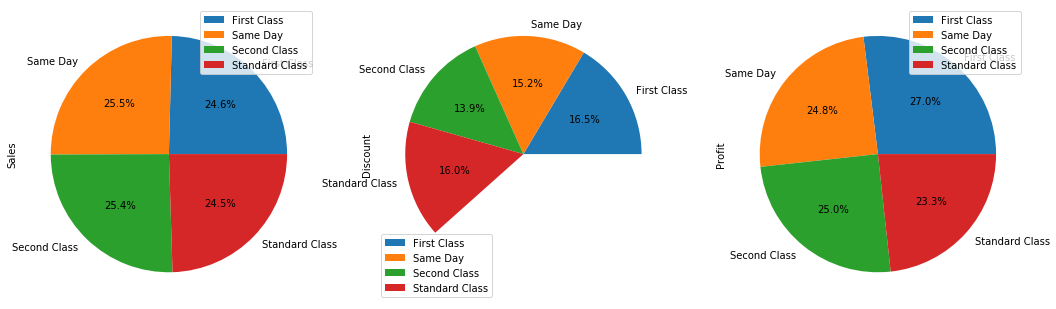

In [ ]:

df_shipmode.plot.pie(subplots=True,
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_shipmode.index)